# Flow - EDA

In [ ]:
import pickle
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)

# pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

plt.rcParams['figure.figsize'] = [18, 6]

In [2]:
df = pd.read_csv('data/train.csv', parse_dates=['tunein', 'tuneout'])

# Create column "min_watching" to indicate how long the user was viewing the content
df.loc[:, 'min_watching'] = (df.tuneout - df.tunein).dt.seconds / 60

df.tail()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
3657796,112339,3386,STB,330.0,2021-03-31 22:10:00,2021-03-31 22:22:00,0,12.0
3657797,112339,3386,STB,9931.0,2021-03-31 22:22:00,2021-03-31 22:34:00,1,12.0
3657798,112339,3386,STB,29929.0,2021-03-31 22:34:00,2021-03-31 22:46:00,0,12.0
3657799,112339,3386,STB,29929.0,2021-03-31 23:09:00,2021-03-31 23:13:00,1,4.0
3657800,112339,3386,STB,29929.0,2021-03-31 23:13:00,2021-03-31 23:24:00,0,11.0


In [7]:
df_meta = pd.read_csv('data/metadata.csv', sep=';', parse_dates=['released_year','create_date','modify_date','start_vod_date','end_vod_date'])
df_meta.tail(3)

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
33141,20468,943.0,T:2 Ep:34 Programa De Talentos,Prog_De_Tal_T2_E34,El antagonista,TV,2011.0,US,Infantil/Comedia,"Instituto,Amigos,Música",Fletcher crea una animación en la que parodia ...,Tres amigos acaban de convertirse en los nuevo...,Gülru arruinó el nuevo diseño de Gulfem.,Dan Signer,24.0,Teens,N,N,N,N,N,N,N,N,N,N,2021-02-23 10:57:32+00:00,2021-02-24 20:22:16+00:00,2021-02-17 00:00:00+00:00,2021-03-19 23:59:59+00:00
33142,3779,1957.0,T:2 Ep:05 Batwoman,Batwoman_T2_E05,Gore sobre lienzo,Serie,2021.0,US,Acción/Aventura,"DC Comics,Superhéroes,Mujeres,Comics",La tensión aumenta en el equipo cuando Luke y ...,La tensión aumenta en el equipo cuando Luke y ...,"Javicia Leslie, Rachel Skarsten, Meagan Tandy,...",Holly Dale,42.0,General,N,N,N,N,N,N,N,N,N,Y,2021-03-26 09:49:52+00:00,2021-03-26 10:06:04+00:00,2021-02-26 00:00:00+00:00,2024-01-28 23:59:00+00:00
33143,30238,1041.0,T:1 Ep:25 Manzana y Cebollín,Manzana_y_Ce_T1_E24,El corto de Manzana,TV,2017.0,US,Infantil/Dibujos Animados,"Amigos,Travesuras",Manzana tiene que ser alto para poder enamorarse.,Manzana tiene que ser alto para poder enamorarse.,"Sayed Badreya, Richard Ayoade, George Gendi",Benton Connor,11.0,Teens,N,N,N,N,N,N,N,N,N,N,2021-02-05 17:40:30+00:00,2021-02-05 21:06:06+00:00,2021-02-01 00:00:00+00:00,2021-02-28 23:59:00+00:00


In [45]:
# df = pd.merge(df, df_meta, how='left', on='asset_id')
# df.tail(3)

### Count plots

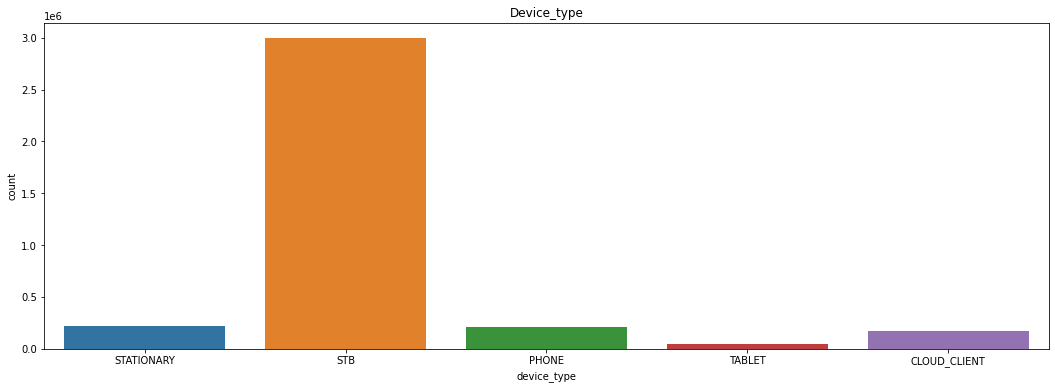

In [5]:
sns.countplot(df.device_type)
plt.title('Device_type');
plt.show()

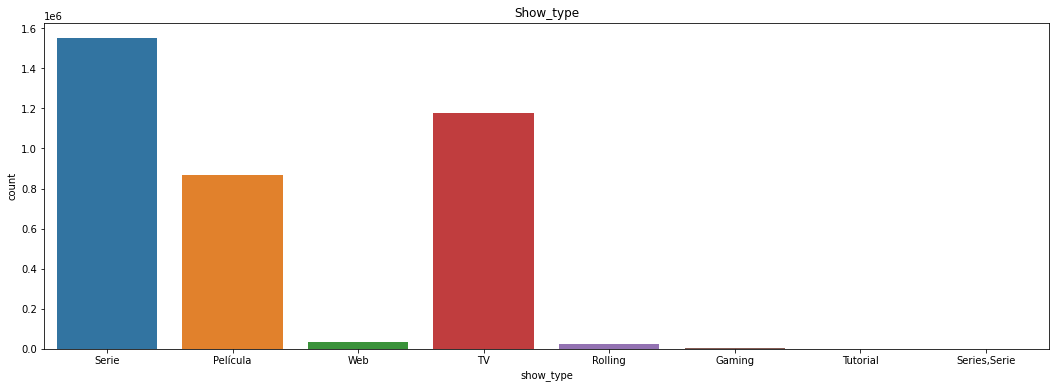

In [6]:
sns.countplot(df.show_type)
plt.title('Show_type');
plt.show()

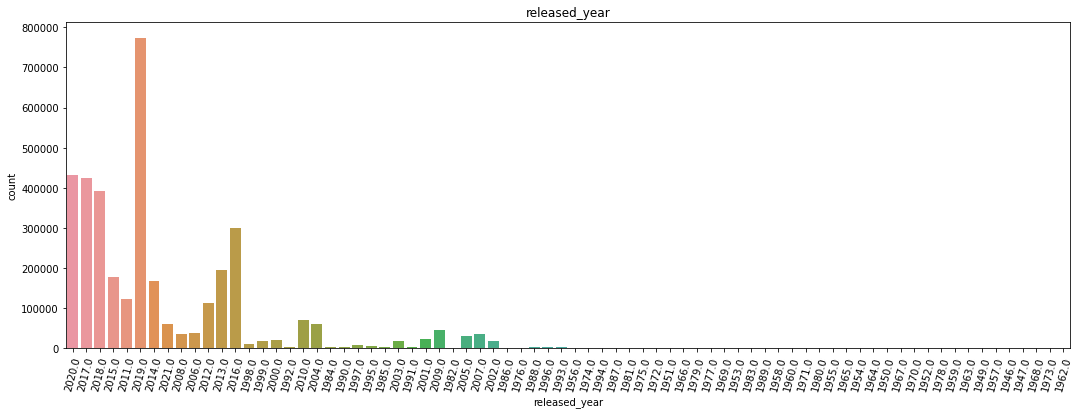

In [7]:
sns.countplot(df.released_year)
plt.title('released_year');
plt.xticks(rotation=75)
plt.show()

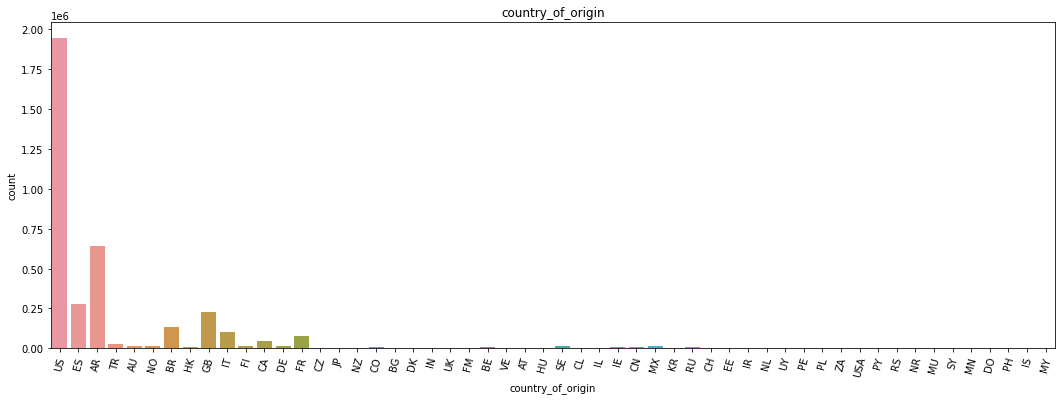

In [8]:
sns.countplot(df.country_of_origin)
plt.title('country_of_origin');
plt.xticks(rotation=75)
plt.show()

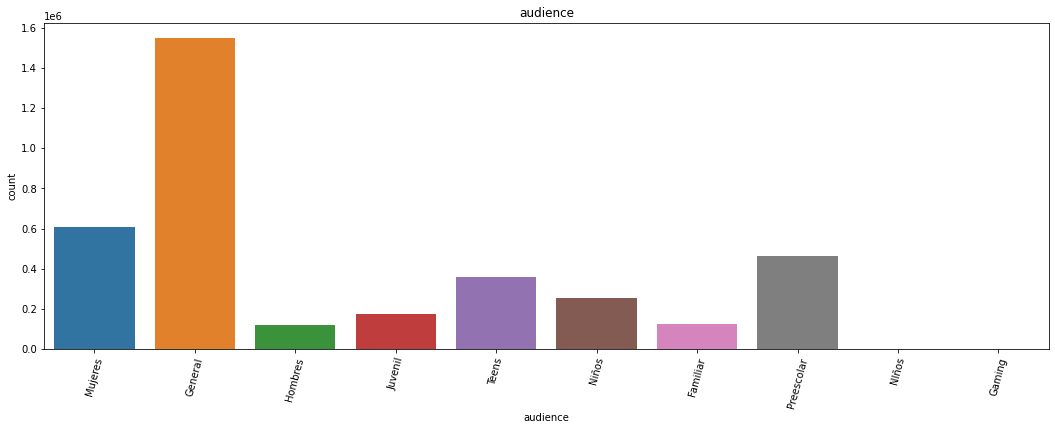

In [9]:
sns.countplot(df.audience)
plt.title('audience');
plt.xticks(rotation=75)
plt.show()

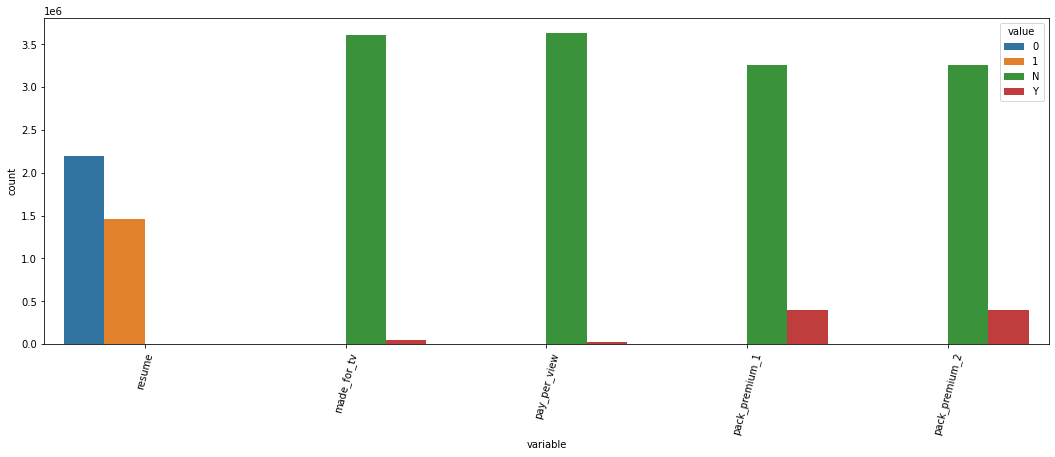

In [11]:
dummy_cols = ['resume', 'made_for_tv', 'pay_per_view', 'pack_premium_1', 'pack_premium_2']

sns.countplot(data=pd.melt(df[dummy_cols]), x='variable', hue='value')
plt.xticks(rotation=75)
plt.show()

- Lets drop columns with unique values

In [16]:
df.drop(columns=['made_for_tv', 'close_caption', 'sex_rating', 'violence_rating', 'language_rating', 'dialog_rating', 'fv_rating', 'pay_per_view'],
        inplace=True)

### Profiles

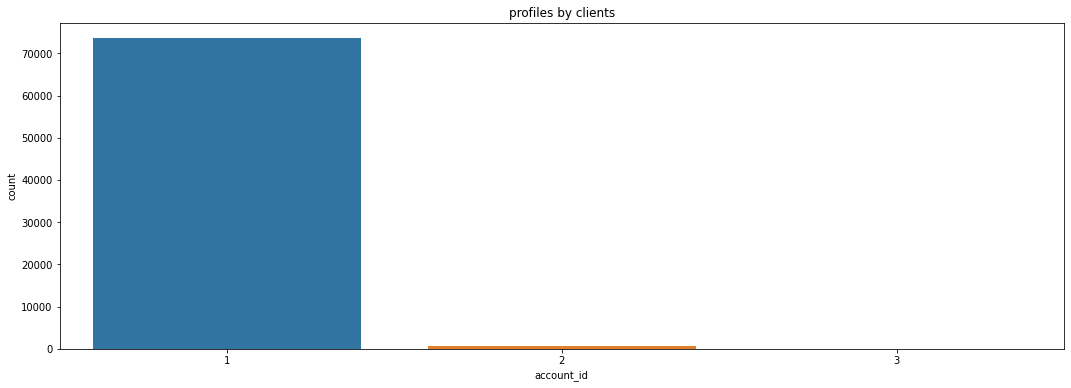

In [17]:
# profiles by clients

account_by_customer = df.drop_duplicates(subset=['account_id']).groupby(['customer_id'])['account_id'].agg('count').sort_values(ascending=False)

sns.countplot(account_by_customer)
plt.title("profiles by clients")
plt.show()

- Delete "customer_id" column

In [18]:
df.drop(columns=['customer_id'], inplace=True)

### Categories

In [19]:
# Clean up the category strings and binarize them

df.category = df.category.str.lower().str.replace('á', 'a')\
                                     .str.replace('é', 'e')\
                                     .str.replace('í', 'i')\
                                     .str.replace('ó', 'o')\
                                     .str.replace('ú', 'u')\
                                     .str.replace('familiar', 'familia')\
                                     .str.replace('aventuras', 'aventura')\
                                     .str.replace('musical', 'musica')

df_cat = df.category.str.get_dummies(sep='/')

categories_list = df_cat.columns.values.tolist()

# Join categories columns to df

df = pd.concat([df, df_cat], axis=1)
df.tail(3)

,account_id,asset_id,tunein,tuneout,resume,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date,time_spend,accion,animacion,animales,aventura,belico,biografia,ciencia,ciencia ficcion,cocina,comedia,competencia,crimen,cultura,decodificador flow,deporte,dibujos animados,documental,drama,entretenimiento,entrevistas,espectaculo,familia,fantasia,historia,humor,infantil,interes general,investigacion,magazine,moda,musica,naturaleza,periodistico,policial,politico,reality,religion,restauracion,romance,suspenso,teatro,terror,tutoriales,viajes,western
365777,46133,10690.0,2021-03-02 12:59:00,2021-03-02 13:10:00,0,712.0,T:1 Ep:12 T.O.T.S. Tiny Ones Transfer Service,TOTS_Tiny_On_T1_E12,Episodio 12,TV,2019.0,US,infantil/dibujos animados,"Animales,Amigos",Pip queda encerrado en una caja con un canguro...,Sigue las divertidas aventuras de un pingüino ...,NaN,NaN,11.0,Preescolar,N,N,2020-07-22 14:12:27+00:00,2021-02-28 06:04:52+00:00,2020-07-11 00:00:00+00:00,2021-04-29 23:59:59+00:00,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365778,97995,22116.0,2021-02-18 19:50:00,2021-02-18 20:03:00,1,1472.0,Scooby-Doo! Misterio en la lucha libre,Scooby_Doo__Misteri,NaN,Película,2017.0,US,infantil/dibujos animados,"Detectives,Mascotas,Aventuras,Saga",Scooby y sus amigos ganan unas entradas para e...,Scooby y sus amigos ganan unas entradas para e...,"Frank Welker, Grey Griffin, Matthew Lillard, M...",Brandon Vietti,81.0,Niños,N,N,2021-01-28 11:04:02+00:00,2021-01-28 12:06:01+00:00,2021-01-10 00:00:00+00:00,2021-02-20 23:59:00+00:00,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365779,55812,19353.0,2021-02-05 20:20:00,2021-02-05 20:39:00,0,2968.0,Mejor imposible,Mejor_imposible,NaN,Película,1997.0,US,comedia/romance,"Trastornos,Escritores,Taquilleras,Nueva York",Melvin es un escritor amargado con trastorno o...,"Melvin, un escritor amargado con trastorno obs...","Jack Nicholson, Helen Hunt, Cuba Gooding Jr., ...",James L. Brooks,138.0,General,N,N,2020-09-10 05:41:29+00:00,2020-09-10 06:06:02+00:00,2020-09-01 00:00:00+00:00,2021-05-31 23:59:00+00:00,19.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


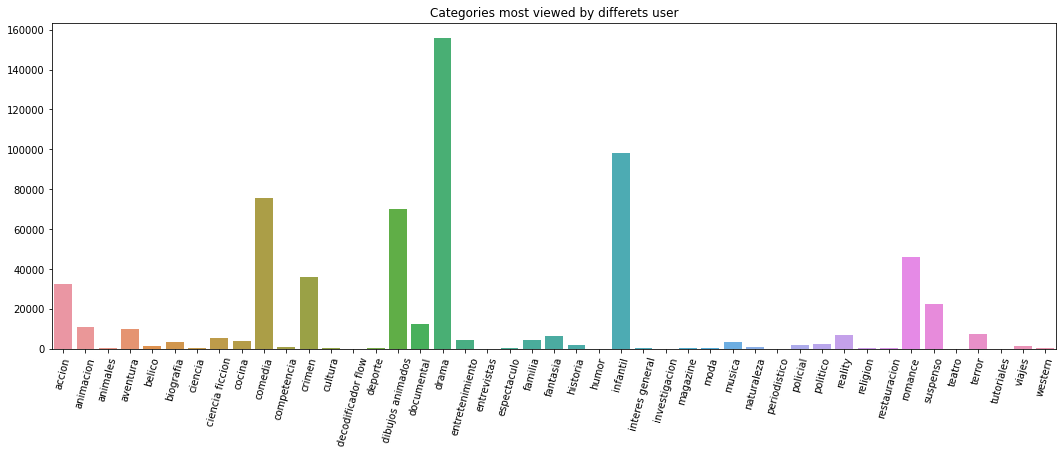

In [20]:
# Show categories most viewed by differets user

sns.barplot(df.drop_duplicates(subset=['account_id', 'asset_id'])[categories_list].sum().index, 
            df.drop_duplicates(subset=['account_id', 'asset_id'])[categories_list].sum().values)
plt.xticks(rotation=75)
plt.title("Categories most viewed by differets user")
plt.show()

In [21]:
df.columns

Index(['account_id', 'asset_id', 'tunein', 'tuneout', 'resume', 'content_id',
       'title', 'reduced_title', 'episode_title', 'show_type', 'released_year',
       'country_of_origin', 'category', 'keywords', 'description',
       'reduced_desc', 'cast_first_name', 'credits_first_name', 'run_time_min',
       'audience', 'pack_premium_1', 'pack_premium_2', 'create_date',
       'modify_date', 'start_vod_date', 'end_vod_date', 'time_spend', 'accion',
       'animacion', 'animales', 'aventura', 'belico', 'biografia', 'ciencia',
       'ciencia ficcion', 'cocina', 'comedia', 'competencia', 'crimen',
       'cultura', 'decodificador flow', 'deporte', 'dibujos animados',
       'documental', 'drama', 'entretenimiento', 'entrevistas', 'espectaculo',
       'familia', 'fantasia', 'historia', 'humor', 'infantil',
       'interes general', 'investigacion', 'magazine', 'moda', 'musica',
       'naturaleza', 'periodistico', 'policial', 'politico', 'reality',
       'religion', 'restauracion', 'r

### Dates

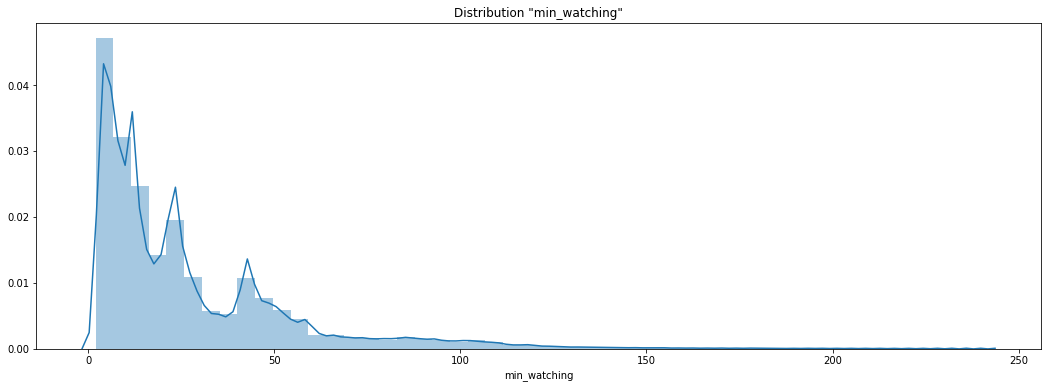

In [9]:
sns.distplot(df.min_watching)
plt.title('Distribution "min_watching"')
plt.show()

In [43]:
df.min_watching.min(), df.min_watching.max()

(2.0, 240.0)

In [112]:
df_ = df.sort_values('account_id').iloc[:1000]

In [114]:
df_.tail()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
3273408,98429,34,STB,18448.0,2021-02-23 22:54:00,2021-02-23 23:44:00,0,50.0
3273407,98429,34,STB,29761.0,2021-02-23 22:15:00,2021-02-23 22:52:00,1,37.0
3273395,98429,34,CLOUD_CLIENT,13628.0,2021-02-21 12:09:00,2021-02-21 12:19:00,0,10.0
3273396,98429,34,STB,2644.0,2021-02-21 22:39:00,2021-02-21 23:40:00,0,61.0
3273397,98429,34,STB,9833.0,2021-02-21 23:58:00,2021-02-22 00:51:00,1,53.0


In [125]:
agg_funcs = {
    'account_id': 'first',
    'asset_id': 'first',
    'tunein': 'first',
    'tuneout': 'last',
    'resume': 'first',
    'min_watching': 'sum'
}

def joins_views(df_gr):
    df_gr = (
        df_gr.groupby(df_gr['resume'].eq(0).cumsum(), as_index=False)
        .agg(agg_funcs)
    )
    
    return df_gr

In [144]:
df_.iloc[:2]

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
3164584,94636,0,STB,29811.0,2021-01-12 21:13:00,2021-01-12 22:32:00,0,79.0
3164585,94636,0,STB,13056.0,2021-01-13 00:12:00,2021-01-13 01:17:00,1,65.0


In [143]:
df_.iloc[1:2].groupby(df_.iloc[1:2]['resume'].eq(0).cumsum(), as_index=False)\
        .agg(agg_funcs)

,account_id,asset_id,tunein,tuneout,resume,min_watching
0,0,13056.0,2021-01-13 00:12:00,2021-01-13 01:17:00,1,65.0


In [126]:
df_.groupby(['account_id', 'asset_id'], as_index=False).apply(joins_views)

.........2.3.......................2.3.....2......2......322.....2......22.....2..3........3...22.22.............5.32....3.3...6..2..2......32.......2.2.....2............2............2...2....2......2..............2.2.2...2........2...22.22.....2....2....2........................4..........2........2.2................22........3....2......2............3.....2............3..22.2..2..3...22..........2..3.2..22.32............322........2.....2......23...2....2.....2.......11..3..3...22............42.3...2.2322...2.2...3.2....2.....2...22.3....42...22...........2.2......................4...22....2......2.2.6...........6586..5382....3....223................2.233....................2......2................2...2........2.3.22..2....22.............2......2..2.......

,,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
0,3164588,94636.0,0,CLOUD_CLIENT,6397.0,2021-02-25 21:05:00,2021-02-25 21:53:00,0,48.0
1,3164585,94636.0,0,STB,13056.0,2021-01-13 00:12:00,2021-01-13 01:17:00,1,65.0
2,3164587,94636.0,0,STB,15900.0,2021-01-18 15:21:00,2021-01-18 17:29:00,0,128.0
3,3164584,94636.0,0,STB,29811.0,2021-01-12 21:13:00,2021-01-12 22:32:00,0,79.0
4,3164586,94636.0,0,STB,29897.0,2021-01-17 01:45:00,2021-01-17 02:01:00,1,16.0
...,...,...,...,...,...,...,...,...,...
762,3273443,98429.0,34,STB,30980.0,2021-03-05 00:07:00,2021-03-05 00:45:00,1,38.0
763,3273459,98429.0,34,STB,31800.0,2021-03-30 23:00:00,2021-03-30 23:02:00,1,2.0
764,3273354,98429.0,34,STB,32338.0,2021-01-25 21:52:00,2021-01-25 22:35:00,1,43.0
765,3273348,98429.0,34,STB,32755.0,2021-01-17 22:18:00,2021-01-17 23:17:00,0,59.0


In [101]:
df_2 = df_.sort_values('account_id').iloc[:10].reset_index(drop=True)
df_2

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
0,94807,3,CLOUD_CLIENT,1463.0,2021-02-05 17:56:00,2021-02-05 18:13:00,0,17.0
1,94945,5,CLOUD_CLIENT,32732.0,2021-01-16 21:29:00,2021-01-16 21:34:00,0,5.0
2,95182,6,STB,3154.0,2021-01-11 12:20:00,2021-01-11 12:28:00,1,8.0
3,95182,6,STB,13837.0,2021-01-26 16:41:00,2021-01-26 16:57:00,1,16.0
4,95182,6,STB,294.0,2021-01-10 18:00:00,2021-01-10 18:43:00,1,43.0
5,96916,19,STB,9199.0,2021-03-17 17:00:00,2021-03-17 17:50:00,0,50.0
6,97412,23,STB,6024.0,2021-02-14 01:40:00,2021-02-14 01:50:00,1,10.0
7,97412,23,STB,32998.0,2021-02-22 00:42:00,2021-02-22 00:44:00,0,2.0
8,97658,27,PHONE,21295.0,2021-01-14 16:46:00,2021-01-14 17:28:00,0,42.0
9,97818,28,CLOUD_CLIENT,25437.0,2021-03-07 17:44:00,2021-03-07 18:03:00,0,19.0


In [106]:
df_2[df_2['account_id'] != df_2.shift(-1)['account_id']]

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
0,94807,3,CLOUD_CLIENT,1463.0,2021-02-05 17:56:00,2021-02-05 18:13:00,0,17.0
1,94945,5,CLOUD_CLIENT,32732.0,2021-01-16 21:29:00,2021-01-16 21:34:00,0,5.0
4,95182,6,STB,294.0,2021-01-10 18:00:00,2021-01-10 18:43:00,1,43.0
5,96916,19,STB,9199.0,2021-03-17 17:00:00,2021-03-17 17:50:00,0,50.0
7,97412,23,STB,32998.0,2021-02-22 00:42:00,2021-02-22 00:44:00,0,2.0
8,97658,27,PHONE,21295.0,2021-01-14 16:46:00,2021-01-14 17:28:00,0,42.0
9,97818,28,CLOUD_CLIENT,25437.0,2021-03-07 17:44:00,2021-03-07 18:03:00,0,19.0


In [89]:
agg_funcs = {
    'account_id': 'first',
    'asset_id': 'first',
    'tunein': 'first',
    'tuneout': 'last',
    'resume': 'first',
    'min_watching': 'sum'
}

In [68]:
df_g

,,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,min_watching
0,2242900,69921.0,88299,STB,0.0,2021-01-26 18:37:00,2021-01-26 18:49:00,0,12.0
1,50152,1713.0,27388,STB,1.0,2021-01-16 08:26:00,2021-01-16 08:30:00,1,4.0
2,1053944,35952.0,55863,STB,1.0,2021-01-16 19:38:00,2021-01-16 21:27:00,0,109.0
3,2835546,84707.0,104817,TABLET,2.0,2021-01-19 16:51:00,2021-01-19 16:54:00,0,3.0
4,2351948,72853.0,91341,CLOUD_CLIENT,8.0,2021-03-14 14:23:00,2021-03-14 15:16:00,0,53.0
...,...,...,...,...,...,...,...,...,...
36305,2894999,85784.0,106134,STB,33128.0,2021-02-02 02:10:00,2021-02-02 02:34:00,0,24.0
36306,3598265,110289.0,39678,PHONE,33132.0,2021-01-24 02:01:00,2021-01-24 02:16:00,0,15.0
36307,1453712,47412.0,71508,STB,33139.0,2021-03-09 21:16:00,2021-03-09 21:18:00,0,2.0
36308,309931,10931.0,56809,STB,33141.0,2021-02-16 12:46:00,2021-02-16 12:49:00,1,3.0


In [66]:
agg_funcs = {
    'account_id': 'first',
    'asset_id': 'first',
    'tunein': 'first',
    'tuneout': 'last',
    'resume': 'first',
    'min_watching': 'sum'
}

g[1].groupby(df_sos['resume'].eq(0).cumsum(), as_index=False)\
    .agg(agg_funcs)

,account_id,asset_id,tunein,tuneout,resume,min_watching


In [20]:
%%time

df_resume = df.groupby(['asset_id', 'account_id'], as_index=False).agg({
    'tunein': list,
    'tuneout': list,
    'resume': list,
    'min_watching': list
})

df_resume.tail()

CPU times: user 37.8 s, sys: 112 ms, total: 38 s
Wall time: 38 s


,asset_id,account_id,tunein,tuneout,resume,min_watching
344235,33141.0,88462,[2021-02-02 18:19:00],[2021-02-02 18:41:00],[0],[22.0]
344236,33141.0,88952,[2021-02-07 12:57:00],[2021-02-07 13:07:00],[1],[10.0]
344237,33141.0,92600,[2021-02-08 16:33:00],[2021-02-08 16:55:00],[1],[22.0]
344238,33141.0,107452,[2021-02-08 17:37:00],[2021-02-08 17:59:00],[0],[22.0]
344239,33143.0,87270,[2021-03-05 16:54:00],[2021-03-05 16:56:00],[1],[2.0]


In [62]:
df_resume[df_resume.resume.map(len) > 20].iloc[:5]

,asset_id,account_id,tunein,tuneout,resume,min_watching
3561,479.0,3042,"[2021-02-21 12:44:00, 2021-03-30 10:57:00, 202...","[2021-02-21 12:46:00, 2021-03-30 10:59:00, 202...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, ..."
30048,2967.0,61745,"[2021-03-10 22:04:00, 2021-01-27 17:01:00, 202...","[2021-03-10 22:15:00, 2021-01-27 17:20:00, 202...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[11.0, 19.0, 25.0, 27.0, 27.0, 25.0, 26.0, 4.0..."
30111,2967.0,83919,"[2021-01-08 19:19:00, 2021-03-27 17:41:00, 202...","[2021-01-08 19:45:00, 2021-03-27 18:07:00, 202...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[26.0, 26.0, 21.0, 19.0, 19.0, 22.0, 26.0, 27...."
30150,2967.0,102343,"[2021-03-25 08:30:00, 2021-03-28 08:41:00, 202...","[2021-03-25 08:39:00, 2021-03-28 08:45:00, 202...","[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[9.0, 4.0, 26.0, 5.0, 19.0, 27.0, 9.0, 27.0, 2..."
46443,4563.0,3042,"[2021-01-28 10:02:00, 2021-03-13 09:27:00, 202...","[2021-01-28 10:05:00, 2021-03-13 09:30:00, 202...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, ..."


In [8]:
df_meta[df_meta.asset_id == 2967]

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
25764,2967,304.0,T:1 Ep:03 La Granja de Zenón,La_Granja_de_T1_E03,Episodio 3,TV,2016.0,AR,Infantil/Dibujos Animados,"Música,Granja,Educativo",El éxito de las Canciones de la Granja llega c...,El éxito de las Canciones de la Granja llega c...,NaN,NaN,26.0,Preescolar,N,N,N,N,N,N,N,N,N,N,2020-11-26 16:27:08+00:00,2020-12-21 10:06:06+00:00,2020-12-15 00:00:00+00:00,2021-06-01 23:59:00+00:00


In [38]:
df_sos = df[(df.account_id == 61745) & (df.asset_id == 2967.0)
  ].sort_values('tunein').iloc[:15][['account_id', 'asset_id', 'tunein', 'tuneout', 'resume', 'min_watching']]

df_sos

,account_id,asset_id,tunein,tuneout,resume,min_watching
1289829,61745,2967.0,2021-01-08 12:42:00,2021-01-08 13:01:00,0,19.0
1289830,61745,2967.0,2021-01-08 15:48:00,2021-01-08 15:51:00,1,3.0
1289831,61745,2967.0,2021-01-08 15:52:00,2021-01-08 15:56:00,1,4.0
1289832,61745,2967.0,2021-01-08 15:57:00,2021-01-08 16:23:00,0,26.0
1289834,61745,2967.0,2021-01-09 21:06:00,2021-01-09 21:10:00,0,4.0
1289835,61745,2967.0,2021-01-10 10:17:00,2021-01-10 10:37:00,1,20.0
1289836,61745,2967.0,2021-01-10 17:55:00,2021-01-10 17:58:00,1,3.0
1289839,61745,2967.0,2021-01-13 18:38:00,2021-01-13 18:57:00,0,19.0
1289840,61745,2967.0,2021-01-14 09:08:00,2021-01-14 09:15:00,1,7.0
1289841,61745,2967.0,2021-01-14 09:15:00,2021-01-14 09:42:00,0,27.0


In [39]:
df_sos['resume'].eq(0).cumsum()

1289829    1
1289830    1
1289831    1
1289832    2
1289834    3
1289835    3
1289836    3
1289839    4
1289840    4
1289841    5
1289842    6
1289843    7
1289844    8
1289845    8
1289846    8
Name: resume, dtype: int64

In [ ]:
x=x[x.Address != x.shift(-1).Address]

In [94]:
df_sos[df_sos['account_id'] != df_sos.shift(-1)['account_id']]

,account_id,asset_id,tunein,tuneout,resume,min_watching
1289846,61745,2967.0,2021-01-15 18:44:00,2021-01-15 18:50:00,1,6.0


In [40]:
agg_funcs = {
    'account_id': 'first',
    'asset_id': 'first',
    'tunein': 'first',
    'tuneout': 'last',
    'resume': 'first',
    'min_watching': 'sum'
}

df_sos_ = (
    df_sos.groupby(df_sos['resume'].eq(0).cumsum(), as_index=False)
        .agg(agg_funcs)
)
df_sos_

,account_id,asset_id,tunein,tuneout,resume,min_watching
0,61745,2967.0,2021-01-08 12:42:00,2021-01-08 15:56:00,0,26.0
1,61745,2967.0,2021-01-08 15:57:00,2021-01-08 16:23:00,0,26.0
2,61745,2967.0,2021-01-09 21:06:00,2021-01-10 17:58:00,0,27.0
3,61745,2967.0,2021-01-13 18:38:00,2021-01-14 09:15:00,0,26.0
4,61745,2967.0,2021-01-14 09:15:00,2021-01-14 09:42:00,0,27.0
5,61745,2967.0,2021-01-14 21:21:00,2021-01-14 21:48:00,0,27.0
6,61745,2967.0,2021-01-14 21:48:00,2021-01-14 22:14:00,0,26.0
7,61745,2967.0,2021-01-15 09:40:00,2021-01-15 18:50:00,0,32.0


In [47]:
df.min_watching.describe()

count    365780.00
mean         26.96
std          29.40
min           2.00
25%           7.00
50%          17.00
75%          38.00
max         240.00
Name: min_watching, dtype: float64

In [28]:
df_resume_1 = df_resume[df_resume.resume.map(lambda xs: True if (len(xs) == 1) and (xs[0] == 1) else False)].copy()

df_resume_1.loc[:, 'tunein'] = df_resume_1.tunein.map(lambda x: x[0])
df_resume_1.loc[:, 'tuneout'] = df_resume_1.tuneout.map(lambda x: x[0])
df_resume_1.loc[:, 'resume'] = df_resume_1.resume.map(lambda x: x[0])
df_resume_1.loc[:, 'min_watching'] = df_resume_1.min_watching.map(lambda x: x[0])

df_resume_1.tail()

,asset_id,account_id,tunein,tuneout,resume,min_watching
344233,33141.0,75877,2021-02-11 12:44:00,2021-02-11 12:55:00,1,11.0
344234,33141.0,81428,2021-01-22 23:19:00,2021-01-22 23:41:00,1,22.0
344236,33141.0,88952,2021-02-07 12:57:00,2021-02-07 13:07:00,1,10.0
344237,33141.0,92600,2021-02-08 16:33:00,2021-02-08 16:55:00,1,22.0
344239,33143.0,87270,2021-03-05 16:54:00,2021-03-05 16:56:00,1,2.0


In [35]:
df_resume_1.min_watching.describe()

count    131782.00
mean         23.71
std          26.14
min           2.00
25%           7.00
50%          15.00
75%          31.00
max         240.00
Name: min_watching, dtype: float64

In [39]:
df_resume_1.tunein.dt.date.describe()

count         131782
unique            90
top       2021-03-21
freq            2240
Name: tunein, dtype: object

In [31]:
df_resume_1.min_watching.min(), df_resume_1.min_watching.max()

(2.0, 240.0)

In [40]:
df[(df.resume == 1)][['min_watching', 'run_time_min', 'title', 'asset_id', 'resume']].gru

,min_watching,run_time_min,title,asset_id,resume
3,55.0,54.0,T:1 Ep:02 Big Little Lies,895.0,1
6,12.0,43.0,T:1 Ep:14 The Resident,30840.0,1
7,6.0,43.0,T:1 Ep:14 The Resident,30840.0,1
9,3.0,43.0,T:2 Ep:01 The Resident,13180.0,1
10,27.0,43.0,T:2 Ep:01 The Resident,13180.0,1
...,...,...,...,...,...
3657771,35.0,232.0,La Liga de la Justicia de Zack Snyder,27938.0,1
3657772,72.0,232.0,La Liga de la Justicia de Zack Snyder,27938.0,1
3657788,8.0,23.0,"T:2 Ep:18 Paw Patrol, Patrulla Canina",28581.0,1
3657797,12.0,12.0,T:1 Ep:38 Mickey: Aventuras sobre ruedas,9931.0,1


In [35]:
%%time

df_resume = df.sort_values('tunein').groupby(['asset_id', 'account_id'], as_index=True).agg({
    'tunein': list,
    'tuneout': list,
    'resume': list
})

In [37]:
df_resume.tail()

tunein                tuneout resume
asset_id account_id                                                     
33143.0  64434       [2021-01-16 18:37:00]  [2021-01-16 18:48:00]    [1]
         68720       [2021-02-05 21:05:00]  [2021-02-05 21:07:00]    [1]
         76548       [2021-01-12 17:19:00]  [2021-01-12 18:00:00]    [0]
         87270       [2021-03-05 16:54:00]  [2021-03-05 16:56:00]    [1]
         99689       [2021-02-21 11:11:00]  [2021-02-21 11:22:00]    [1]

In [39]:
df_resume[df_resume.resume.map(len) > 2]

tunein  \
asset_id account_id                                                      
0.0      64732       [2021-02-22 21:23:00, 2021-02-22 21:35:00, 202...   
         70425       [2021-02-12 21:25:00, 2021-02-12 21:28:00, 202...   
         101760      [2021-02-16 17:01:00, 2021-02-17 21:30:00, 202...   
1.0      90970       [2021-01-18 17:51:00, 2021-01-18 20:18:00, 202...   
         91965       [2021-01-07 22:11:00, 2021-01-08 00:03:00, 202...   
...                                                                ...   
33141.0  65758       [2021-01-20 14:47:00, 2021-01-20 15:23:00, 202...   
         70395       [2021-02-27 14:37:00, 2021-02-27 19:08:00, 202...   
         81428       [2021-01-20 14:45:00, 2021-01-22 14:21:00, 202...   
         85398       [2021-01-21 15:18:00, 2021-01-21 18:54:00, 202...   
         104343      [2021-01-08 13:56:00, 2021-01-16 16:38:00, 202...   

                                                               tuneout  \
asset_id account_id                                                      
0.0      64732       [2021-02-22 21:35:00, 2021-02-22 21:47:00, 202...   
         70425       [2021-02-12 21:27:00, 2021-02-12 21:32:00, 202...   
         101760      [2021-02-16 17:03:00, 2021-02-17 21:32:00, 202...   
1.0      90970       [2021-01-18 18:36:00, 2021-01-18 21:12:00, 202...   
         91965       [2021-01-07 23:59:00, 2021-01-08 00:49:00, 202...   
...                                                                ...   
33141.0  65758       [2021-01-20 15:10:00, 2021-01-20 15:37:00, 202...   
         70395       [2021-02-27 14:42:00, 2021-02-27 19:16:00, 202...   
         81428       [2021-01-20 15:03:00, 2021-01-22 14:30:00, 202...   
         85398       [2021-01-21 15:34:00, 2021-01-21 19:17:00, 202...   
         104343      [2021-01-08 14:18:00, 2021-01-16 16:56:00, 202...   

                                          resume  
asset_id account_id                               
0.0      64732                         [0, 0, 0]  
         70425       [0, 1, 0, 0, 1, 0, 1, 0, 0]  
         101760                        [1, 1, 1]  
1.0      90970                         [0, 1, 1]  
         91965                         [0, 1, 1]  
...                                          ...  
33141.0  65758                         [0, 0, 0]  
         70395                      [1, 1, 1, 1]  
         81428                         [1, 1, 1]  
         85398                      [0, 0, 0, 0]  
         104343                  [1, 0, 0, 0, 0]  

[193761 rows x 3 columns]